Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Ressonância

In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Mounted at /content/drive


Carregamento e Organização Inicial do Dataset

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316


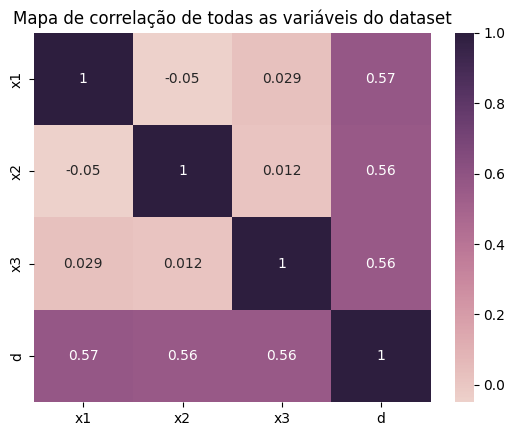

In [2]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/ressonanciaMLP.csv") # Carregamento do dataset via Pandas

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
ax=ax

df.head()

Pré-Processamento dos Dados

In [3]:
x = df.drop('d', axis=1) # Exclusão da variável das entradas
y = df['d'] # Inclusão da variável no vetor de saídas desejadas

# Padronização de dados
scaler = StandardScaler().fit(x) # Cria o modelo para o ajuste
x = scaler.transform(x) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento

Aplicação do MLPRegressor

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(30), activation='relu', solver='adam', alpha=0.01,
                       max_iter=5000, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10) # Deve variar os parâmetros conforme solicita o enunciado

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(x, y)

print("Função de Ativação Saída: ", mlp_reg.out_activation_)
print("Épocas no Treinamento: ", mlp_reg.n_iter_)
print("Perda Final: ", mlp_reg.loss_)

Função de Ativação Saída:  identity
Épocas no Treinamento:  441
Perda Final:  0.0005775799357458117


Avaliação do Erro no Processo de Treinamento

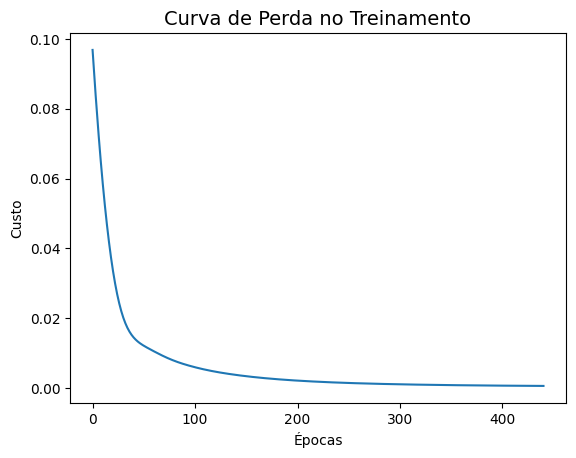

In [9]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Avaliação do Modelo com a Próprias Amostras Treinadas

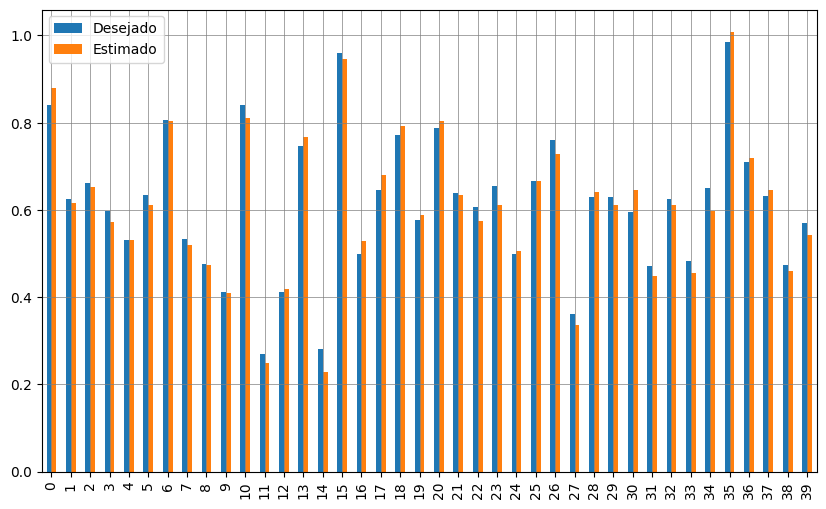

In [8]:
y_pred = mlp_reg.predict(x)

df_temp = pd.DataFrame({'Desejado': y, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Resumo das Métricas

In [13]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2 Score: ', metrics.r2_score(y, y_pred))

Mean Absolute Error (MAE): 0.02120462263212603
Mean Squared Error (MSE): 0.0007342187695437022
Root Mean Squared Error (RMSE): 0.027096471533092685
Mean Absolute Percentage Error (MAPE): 0.03834962887279981
R2 Score:  0.977444136810129


Validando o Modelo Treinado com Amostras não Treinadas

Mean Absolute Error (MAE): 0.024003850815183393
Mean Squared Error (MSE): 0.0009162085637560212
Root Mean Squared Error (RMSE): 0.030268937274969224
Mean Absolute Percentage Error (MAPE): 0.04372387062221594
R2 Score:  0.9575484969020506



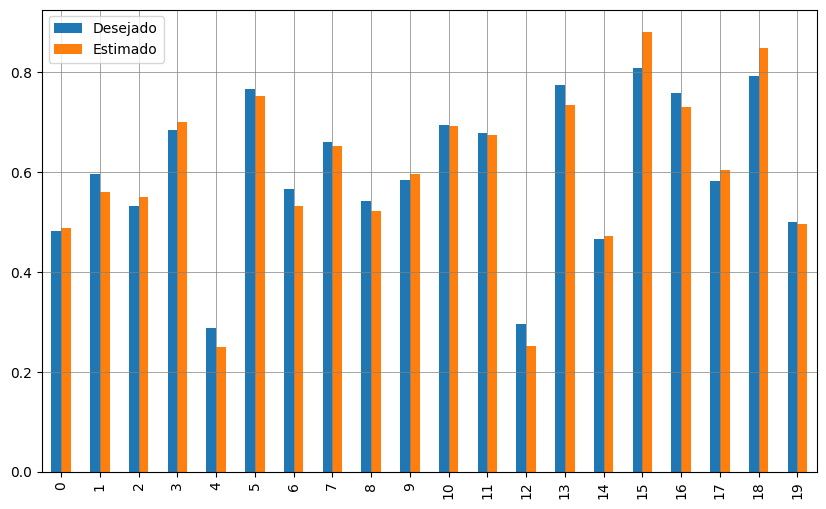

In [16]:
# Caminho do dataset no Google Drive que será carregado em df2 para validar o exercício
df2 = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/ressonanciaMLPTest.csv")
xT = df2.drop('d', axis=1)
yT = df2['d']

xT = scaler.transform(xT)

y_predT = mlp_reg.predict(xT)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(yT, y_predT)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(yT, y_predT)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(yT, y_predT, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(yT, y_predT)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2 Score: ', metrics.r2_score(yT, y_predT))
print('')

df_temp = pd.DataFrame({'Desejado': yT, 'Estimado': y_predT}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural